# Problem Statement
Google Play Store serves as the official app store for the Android operating system, allowing users to browse and download applications. Success of an app is largely determined by its ratings.

But is there any particular pattern among high rated apps? Does size or genre of the app play a role in determining its high rating?

Let's find out.

Conduct an EDA on the Google Play Store data and try to explore whether given the data, ratings of an can be predicted

# About the Dataset
|Features|Description|
|-----|-----|
|App|Name of the app|
|Category|Category the app broadly belongs to|
|Rating|Customer rating of the app|
|Size|Size of the app|
|Installs|Number of Installs done for the app|
|Type|Type of the app(Free/Paid)|
|Price|Price of the app(if any)|
|Content|Rating	What age group is the app appropriate for|
|Genre|What all genres the app belongs to|
|Last Updated|Date on which the app was last updated|
|Current Ver|Version of the app|
|Android Ver|Android Version required by the device to the run the app|

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphs
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
import seaborn as sns

# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Change column display number during print
pd.set_option('display.max_columns', 500)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format

# Data Loading

In [2]:
data = pd.read_csv('GooglePlay.csv')
data.head()
data.info()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Data Cleaning and EDA

### Checking out Rating column.

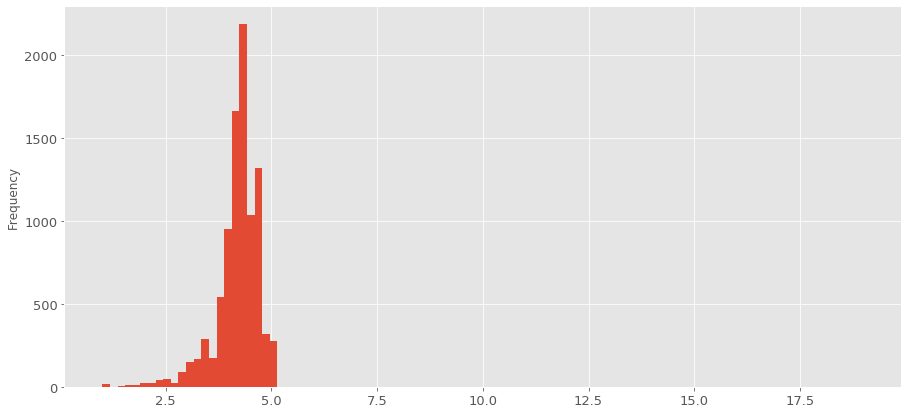

In [116]:
data['Rating'].plot(kind='hist', figsize=(15,7), bins=100);

Plotted histogram shows that there exists **Rating > 5** which shouldn't be there so let's drop them.

In [117]:
data = data[data['Rating'] <= 5]

#### After dealing with Rating column there are null values in only two columns and that too in very few rows. We can straight off drop the null values.

In [118]:
total_null = data.isnull().sum()
percent_null = (total_null/data.isnull().count())
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total','Percent'])
print(missing_data)

data.dropna(inplace=True)

                Total  Percent
App                 0     0.00
Category            0     0.00
Rating              0     0.00
Reviews             0     0.00
Size                0     0.00
Installs            0     0.00
Type                0     0.00
Price               0     0.00
Content Rating      0     0.00
Genres              0     0.00
Last Updated        0     0.00
Current Ver         4     0.00
Android Ver         2     0.00


### Category vs Rating.

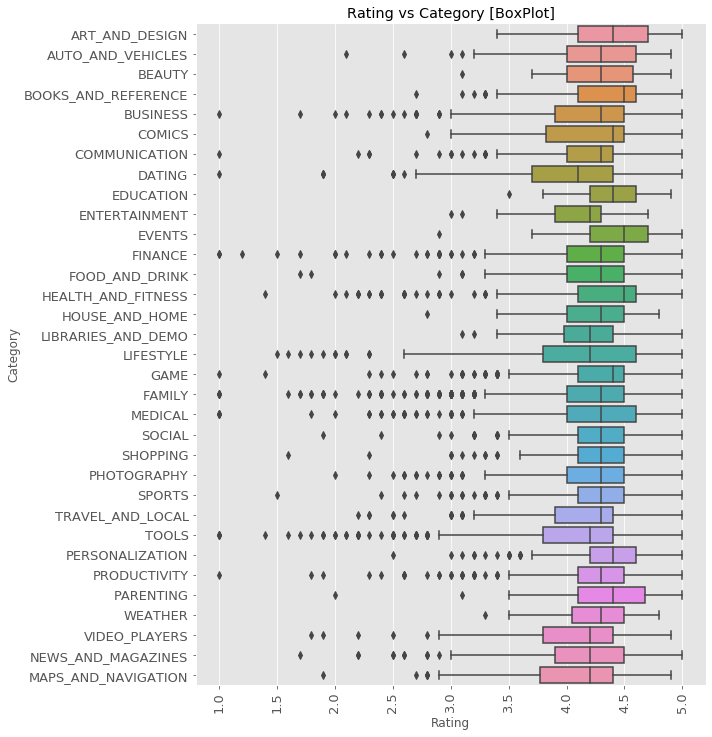

In [55]:
sns.catplot(x="Rating",y="Category",data=data, kind="box",height = 10);
plt.xticks(rotation=90);
plt.title('Rating vs Category [BoxPlot]');

Rating of application in each category **doesn't vary** with each other much.

### Installs vs Ratings

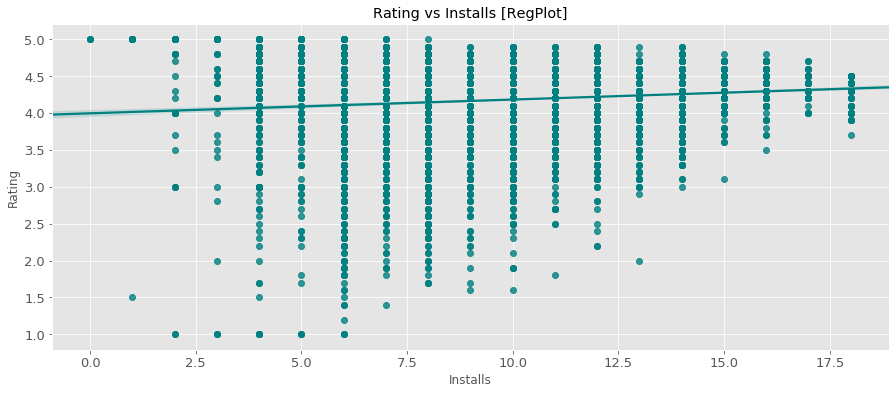

In [56]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
data['Installs'] = data['Installs'].str.replace(',','').str.strip('+')
data['Installs'] = pd.to_numeric(data['Installs'])

le = LabelEncoder()
data['Installs'] = le.fit_transform(data['Installs'])
plt.figure(figsize=(15,6));
sns.regplot(x="Installs", y="Rating", data=data, color='teal');
plt.title('Rating vs Installs [RegPlot]');

There is but a **small positive correlation** between the number of installs and ratings.

### Price vs Ratings

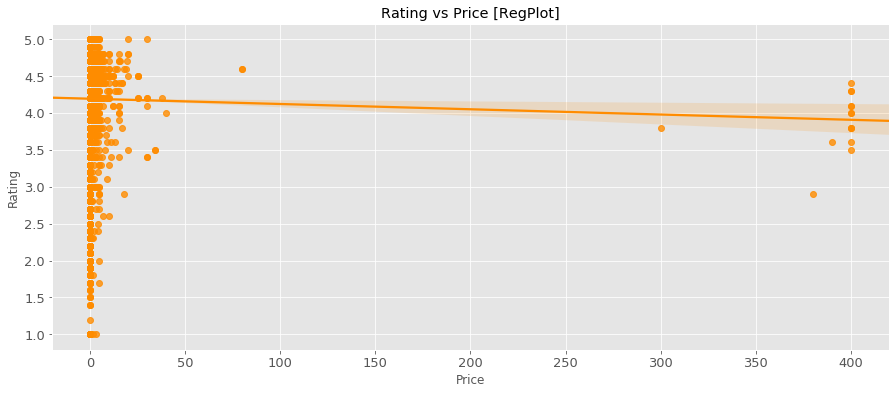

In [70]:
data['Price'] = data['Price'].str.strip('$').astype('float')

plt.figure(figsize = (15,6));
sns.regplot(x="Price", y="Rating", data=data,color='darkorange');
plt.title('Rating vs Price [RegPlot]');

There is a negative correlation between price and ratings. Higher price applications may make customers disappointed if they are not good enough.

## Genre vs Rating

In [119]:
print('Genres have',data['Genres'].nunique(),'unique values')

Genres have 115 unique values


- The column Genres has 115 unique values

- Some of the apps have multiple genres hence resulting in 115 unique combinations

In [120]:
data['Genres'] = data['Genres'].apply(lambda x: x.split(';')[0])
print('Genres now have',data['Genres'].nunique(),'unique values')

Genres now have 48 unique values


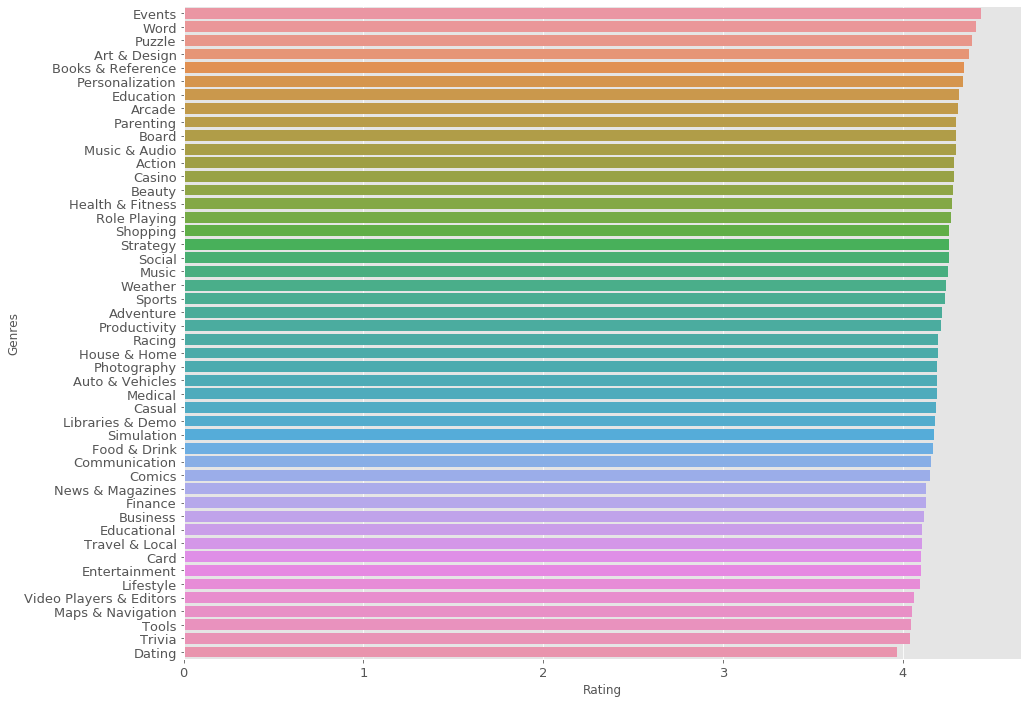

In [121]:
gr_mean = data[['Genres','Rating']].groupby('Genres', as_index=False)['Rating'].mean()
gr_mean = gr_mean.sort_values(by='Rating', ascending=False)

plt.figure(figsize=(15,12));
sns.barplot(y=gr_mean['Genres'], x=gr_mean['Rating']);

- The lowest of average rating on genres (Dating) is 3.97

- The highest of average rating on genres (Events) is 4.43

- Owing to Standard Deviation of 0.1, seems like a genre doesn't have much effect on rating

### Last Updated vs Rating

Last Updated is not of the **date** type.

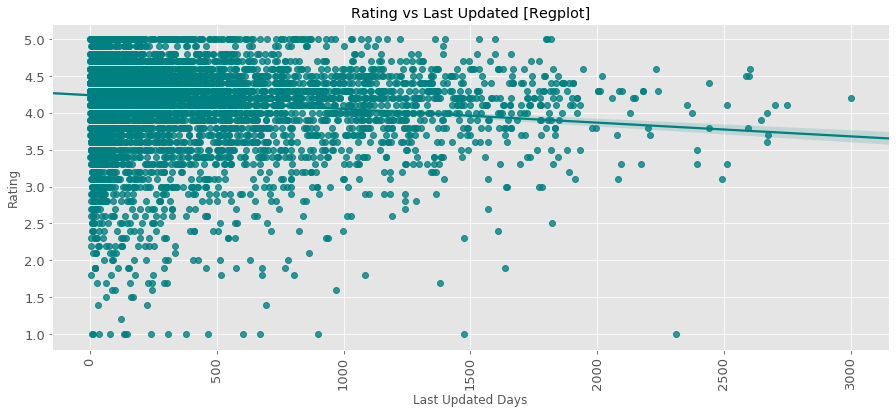

In [122]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
max_date = data['Last Updated'].max()
data['Last Updated Days'] = max_date - data['Last Updated']
data['Last Updated Days'] = data['Last Updated Days'].dt.days

plt.figure(figsize=(15,6));
sns.regplot(x='Last Updated Days', y='Rating', data=data, color='Teal');
plt.xticks(rotation=90);
plt.title('Rating vs Last Updated [Regplot]');

Higher the gap between the days last updated, lower the rating

___